# 哈希表-字典

## 定义
1. 通常保存为数组类型，index为hash值得出
2. 常见操作（初始化、添加键值、删除键值、查询）

## 哈希函数
1. 均匀性-outputs 分布均匀在值域中
2. 单向性-无法从值域空间推测定义域空间
3. 抗碰撞性-难以认为构造hash碰撞
4. 雪崩效应-小的围绕导致严重偏差

均匀性： 通常由hash值与大质数取同余获得。
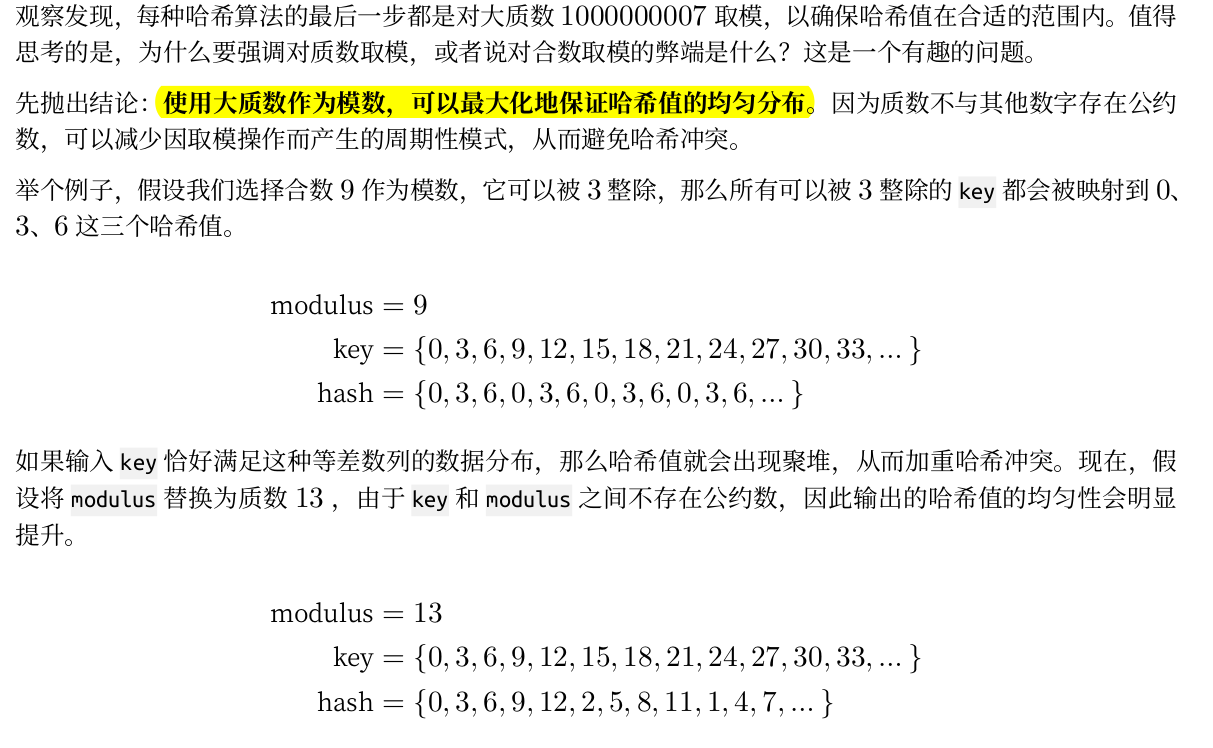

单向性与抗碰撞性由算法复杂的加密过程实现。

雪崩效应： 由模型的非线性或者说离散型保证。（例 洛伦兹方程的混沌系统）

## 能否由AI模型拟合反hash过程？
反对观点：
1. hash函数为离散型函数，ai训练过程近似为收敛过程
2. 值域的维数过大对于仍基于分类的模型来说（？ 但是对于文本生成任务来说仿佛不是问题）
3. 模型无法学习人类不能完成的任务（存疑）


## SHA-256 手搓
https://github.com/pdoms/SHA256-PYTHON

## 手搓 字典

In [ ]:
# 没有解决冲突问题
# 1. 对于字典数组中储存的是 Pair类的指针，因此可以是任意类型 （list、int、str）
class Pair:
  def __init__(self,key,value):
    self.key=key
    self.value=value
class HashTable:
  def __init__(self,capcity:int):
    self.capcity=capcity
    self.array : list[Pair | None ] = [None]*capcity
  def hash_cal(self,key):
    return hash(key) % self.capcity
  def push(self,key,value):
    self.array[self.hash_cal(key)]= Pair(key,value)
  def pop(self,key):
    self.array[self.hash_cal(key)] = None
  def find(self,key):
    return self.array[self.hash_cal(key)].value

hashtable= HashTable(100)
hashtable.push('list',[1,2,3])
hashtable.find('list')
hashtable.push('tuple',(2,1))
hashtable.find('tuple')
hashtable.push(1,'number')
hashtable.find(1)




In [ ]:
# 使用链表解决碰撞后
# 数组中储存ListNode，ListNode值储存Pair类，Listnode的指针指向下一个节点。
class Pair:
  def __init__(self,key,value):
    self.key=key
    self.value=value
class ListNode:
  def __init__(self,pair):
    self.val : Pair| None = pair
    self.next:ListNode|None = None

class HashTableListNode:
  def __init__(self,capcity:int):
    self.capcity=capcity
    self.array : list[ListNode|None] = [None]* self.capcity
  def hash_cal(self,key):
    return hash(key)%self.capcity
  def push(self,key,value):
    index=self.hash_cal(key)
    if self.array[index] ==None:
      self.array[index]=ListNode(Pair(key,value))
    else:
      node=self.array[index]
      insert_node=ListNode(Pair(key,value))
      insert_node.next=node
      self.array[index]=insert_node
  def pop(self,key):
      index = self.hash_cal(key)
      node = self.array[index]
      find = False

      if node == None:
          raise ValueError('表内不存在')  # 'Key does not exist'
      else:
          # Handling the case where it's the only node
          if node.val.key == key:
              self.array[index] = node.next
              find = True
          else:
              # Iterating through the linked list if there are multiple nodes at the same index
              prev = node
              while node != None:
                  if node.val.key == key:
                      prev.next = node.next  # Remove the node
                      find = True
                      break
                  prev = node
                  node = node.next

      if not find:
          raise ValueError('表内无此key')  # 'Key not found'

  def peek(self,key):
    index=self.hash_cal(key)
    node= self.array[index]
    find=False
    if node==None:
      raise ValueError('表内不存在')
    else:
      while node != None:
        if node.val.key ==key:
          find=True
          return node.val.value
        node= node.next
    if find ==False:
      raise ValueError('表内无此key')



## leetcode

In [1]:
# 剑指offer中没有 dict题